1) Identificar el formato de archivo a ser importado

2) Importar los datos dentro de un objeto Python / Numpy / Pandas para su manipulación

3) Identificar nulos y reemplazarlos por valores acordes

4) Reemplazar Nombre de columnas por nuevos descriptivos

5) Ordenar / Rankear los cursos por una variable/columna que nos proveea la relevancia del mismo

6) Crear al menos dos DF diferentes con información que considere relevante

In [1]:
import pandas as pd

In [2]:
df_udemy = pd.read_csv ('https://raw.githubusercontent.com/al34n1x/DataScience/master/3.Pandas/udemy_courses_ejercicio.csv',
                        sep=';', skiprows= [0,1,2,3,4,5,6,7,8,9,10,12], index_col='course_id')

In [23]:
df_udemy

,course_title,url,is_paid,price,number_subscribers,number_reviews,number_lectures,level,content_duration,published_date,subject
course_id,,,,,,,,,,,
41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0.0,268923,8629,45,All Levels,10.500000,2013-02-14T07:03:41Z,Web Development
59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0.0,161029,279,27,Beginner Level,3.500000,2013-06-09T15:51:55Z,Web Development
625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200.0,121584,27445,342,All Levels,43.000000,2015-11-02T21:13:27Z,Web Development
173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0.0,120291,5924,30,Beginner Level,3.000000,2014-04-08T16:21:30Z,Web Development
764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200.0,114512,22412,304,All Levels,30.500000,2016-03-08T22:28:36Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
726314,Create Beautiful Image Maps for Your Website,https://www.udemy.com/how-to-create-hotspot-im...,True,20.0,0,0,8,Intermediate Level,0.616667,2016-01-18T17:56:36Z,Graphic Design
185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20.0,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
181268,Photoshop: Creando elemental de aire,https://www.udemy.com/photoshop-creando-elemen...,True,20.0,0,0,5,Beginner Level,1.000000,2014-04-01T21:50:32Z,Graphic Design


In [4]:
#Búsqueda de NaN exitentes en todo el DF
check_nan_in_df_udemy = df_udemy.isnull().values.any()
print (check_nan_in_df_udemy)

True


In [5]:
#Tratamos de identificar de manera sencilla dónde están los NaN
count_nan_in_df_udemy = df_udemy.isnull().sum()
print (count_nan_in_df_udemy)

course_title            0
url                     0
is_paid                 0
price                  13
num_subscribers         0
num_reviews             0
num_lectures            0
level                  31
content_duration        0
published_timestamp     0
subject                 0
dtype: int64


In [6]:
#Se completan los Nan con un valor acorde, en este caso con un promedio de todos los valores de los cursos
df_udemy['price'] = df_udemy['price'].fillna(df_udemy['price'].mean())

In [7]:
#Vemos que los NaN de price ya no están
count_nan_in_df_udemy = df_udemy.isnull().sum()
print (count_nan_in_df_udemy)

course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                  31
content_duration        0
published_timestamp     0
subject                 0
dtype: int64


In [8]:
#Se buscan las variables dentro de Level para reemplazar los NaN por una variable acorde
(df_udemy['level'].unique())

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', nan], dtype=object)

In [9]:
#Reemplazo de NaN por 'Intermediate Level' en la columna 'level'
df_udemy['level'] = df_udemy['level'].fillna('Intermediate Level')

In [10]:
#Vemos que los NaN de Level ya no están
count_nan_in_df_udemy = df_udemy.isnull().sum()
print (count_nan_in_df_udemy)

course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [11]:

#cambio nombre de columnas
df_udemy.rename(columns = {'num_subscribers':'number_subscribers', 'num_reviews':'number_reviews', 'num_lectures':'number_lectures', 'published_timestamp':'published_date'}, inplace = True)


In [21]:
df_udemy.head(3)

,course_title,url,is_paid,price,number_subscribers,number_reviews,number_lectures,level,content_duration,published_date,subject
course_id,,,,,,,,,,,
41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0.0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development
59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0.0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development
625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200.0,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development


In [12]:
#Orderno por numero de subscriptores
df_udemy.sort_values(by=['number_subscribers'], inplace=True, ascending=False)


In [13]:
df2 = df_udemy.groupby(['subject','level']).agg({'subject': ('count')})


In [14]:
df2

subject
subject             level                      
Business Finance    All Levels              665
                    Beginner Level          340
                    Expert Level             31
                    Intermediate Level      159
Graphic Design      All Levels              298
                    Beginner Level          243
                    Expert Level              5
                    Intermediate Level       57
Musical Instruments All Levels              276
                    Beginner Level          296
                    Expert Level              7
                    Intermediate Level      101
Web Development     All Levels              659
                    Beginner Level          391
                    Expert Level             15
                    Intermediate Level      135

In [ ]:
df_udemy['price_per_unit'] = df_udemy['price']/ df_udemy['content_duration']
df3 = df_udemy[df_udemy['is_paid']==True]
df4 = pd.DataFrame(df3.groupby(['subject','level'])['price_per_unit'].mean())
df4

price_per_unit
subject             level                             
Business Finance    All Levels                     NaN
                    Beginner Level           33.779441
                    Expert Level             58.696686
                    Intermediate Level       40.334348
Graphic Design      All Levels               31.072456
                    Beginner Level           35.100560
                    Expert Level             34.417143
                    Intermediate Level       30.920880
Musical Instruments All Levels               31.846231
                    Beginner Level           26.192746
                    Expert Level             18.010204
                    Intermediate Level       27.822010
Web Development     All Levels               26.885484
                    Beginner Level           35.879011
                    Expert Level             33.523600
                    Intermediate Level       22.194896

In [ ]:
#DataFrame que muestra top 10 de cursos GRATIS con mayores suscriptores
dfa = df_udemy[df_udemy['price']==0]
dfb = pd.DataFrame(dfa.groupby(['course_title','level'])['number_subscribers'].max())
dfb.sort_values(by=['number_subscribers'], ascending=False).head(10)


,,number_subscribers
course_title,level,
Learn HTML5 Programming From Scratch,All Levels,268923
Coding for Entrepreneurs Basic,Beginner Level,161029
Build Your First Website in 1 Week with HTML5 and CSS3,Beginner Level,120291
Free Beginner Electric Guitar Lessons,Beginner Level,101154
Web Design for Web Developers: Build Beautiful Websites!,All Levels,98867
Practical PHP: Master the Basics and Code Dynamic Websites,All Levels,83737
Beginner Photoshop to HTML5 and CSS3,All Levels,73110
Web Development By Doing: HTML / CSS From Scratch,Beginner Level,72932
HTML and CSS for Beginners - Build a Website & Launch ONLINE,All Levels,70773


In [ ]:
#En base al DataFrame de cursos gratis, contamos la cantidad por nivel

dfc = pd.DataFrame(dfa.groupby(['level']).agg({'number_subscribers': ('count')}))
dfc.rename(columns={'number_subscribers': 'quantity'}, inplace=True)
dfc.sort_values(by=['quantity'], ascending=False, inplace=True)
dfc


,quantity
level,
Beginner Level,153
All Levels,113
Intermediate Level,31


In [ ]:
#En base al DataFrame de cursos pagos, contamos la cantidad por nivel.

dfd = pd.DataFrame(df3.groupby(['level']).agg({'number_subscribers': ('count')}))
dfd.rename(columns={'number_subscribers': 'quantity'}, inplace=True)
dfd.sort_values(by=['quantity'], ascending=False, inplace=True)
dfd


,quantity
level,
All Levels,1778
Beginner Level,1112
Intermediate Level,420
Expert Level,58


# Graficos Y Visualizaciones


In [ ]:
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


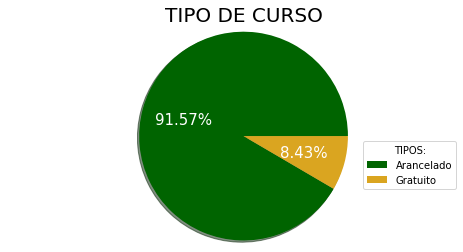

In [ ]:
torta=df_udemy['is_paid'].value_counts().to_frame()
torta
plt.pie(torta, radius=1.2, labeldistance=1.5, labels=['Arancelado','Gratuito'], colors = ['darkgreen','goldenrod'], autopct='%1.2f%%', shadow = True, textprops = dict(color ="white", fontsize=15))
plt.title('TIPO DE CURSO',fontsize=20)
plt.legend(title = "TIPOS:",loc='best', bbox_to_anchor=(1, 0., 0.5, 0.5)) 
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


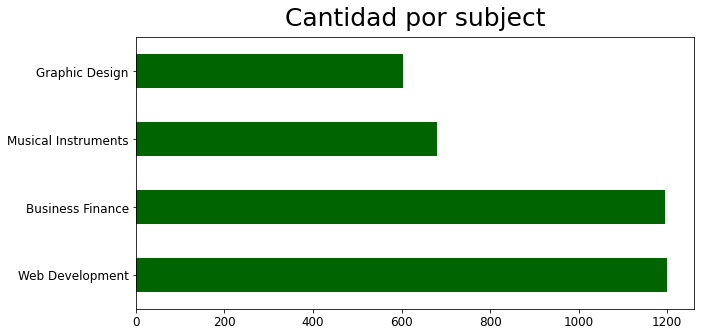

In [ ]:
df_udemy["subject"].value_counts().plot(kind='barh',figsize=(10, 5),color="darkgreen",fontsize=12)
ax = plt.axes()

plt.title("Cantidad por subject", y=1.02,fontsize=25);
plt.show()
plt.close('all')

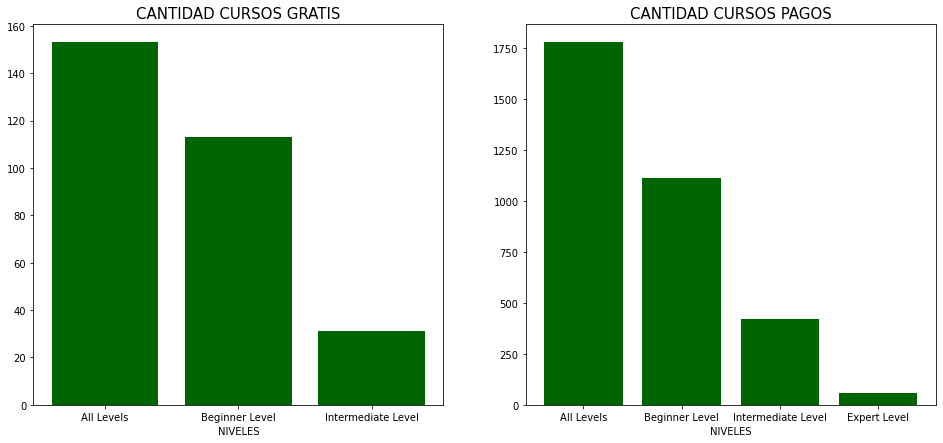

In [ ]:
#Grafico Cursos gratis vs. Cursos pagos

plt.figure(figsize=(25, 7))
plt.subplot(131)
x_values = dfa['level'].unique()
y_values = dfa['level'].value_counts().tolist()
plt.bar(x_values, y_values, color="darkgreen")
plt.title('CANTIDAD CURSOS GRATIS',fontsize=15)
plt.xlabel('NIVELES')

plt.subplot(132)
x_values = df3['level'].unique()
y_values = df3['level'].value_counts().tolist()
plt.bar(x_values, y_values,color="darkgreen")
plt.title('CANTIDAD CURSOS PAGOS',fontsize=15)
plt.xlabel('NIVELES')

plt.show()
plt.close('all')